<a href="https://colab.research.google.com/github/shivankb/online_retail_customer_segmentation/blob/master/online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Online-Retail-Customer-Segmentation**

**Customer segmentation** is a crucial aspect of marketing for online retailers. By dividing their customer base into smaller groups based on shared characteristics, retailers can gain a deeper understanding of their customers' needs and preferences, allowing them to tailor their marketing strategies and product offerings accordingly. The goal of customer segmentation is to improve customer engagement and satisfaction, increase sales and revenue, and gain a competitive advantage in the online retail market.

This project aims to segment the customers of an online retail store into meaningful groups based on their demographic, behavioral, and purchase history data. This information will be analyzed using machine learning algorithms and clustering techniques to provide insights into the purchasing behavior, needs, and preferences of different customer segments. The project will help the online retail store to better understand its customers and make data-driven decisions that will ultimately improve its business.

#Dataset description
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Feature	Description**

1. **InvoiceNo** : Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

2. **StockCode** : Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

3. **Description** : Product (item) name. Nominal.

4. **Quantity** : The quantities of each product (item) per transaction. Numeric.

5. **InvoiceDate** : Invoice Date and time. Numeric, the day and time when each transaction was generated.

6. **UnitPrice** : Unit price. Numeric, Product price per unit in sterling.

7. **CustomerID** : Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

8. **Country** : Country name. Nominal, the name of the country where each customer resides.


#Problem Statement

Since 2018, Yes Bank has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

# **Know Your Data**

## Import Libraries and Dataset Loading

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px 

In [ ]:
# Mounting the Drive

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset

df = pd.read_csv(r"/content/drive/MyDrive/ML Clustering- online retail customer segmentation/Online Retail.xlsx - Online Retail.csv")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [ ]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
def show_missing(df):

  variable=[]
  d_type=[]
  missing=[]
  duplicate=[]
  unique=[]
  count=[]

  for item in df.columns:
    variable.append(item)
    d_type.append(df[item].dtype)
    missing.append(df[item].isna().sum())
    duplicate.append(df.duplicated().sum())
    unique.append(len(df[item].unique()))
    count.append(len(df[item]))

  output = pd.DataFrame({
        "variable":variable,
        "d_type":d_type,
        "missing":missing,
        "duplicate":duplicate,
        "unique":unique,
        "count":count,
    })
  return output

In [ ]:
show_missing(df)

,variable,d_type,missing,duplicate,unique,count
0,InvoiceNo,object,0,5268,25900,541909
1,StockCode,object,0,5268,4070,541909
2,Description,object,1454,5268,4224,541909
3,Quantity,int64,0,5268,722,541909
4,InvoiceDate,object,0,5268,23260,541909
5,UnitPrice,float64,0,5268,1630,541909
6,CustomerID,float64,135080,5268,4373,541909
7,Country,object,0,5268,38,541909


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


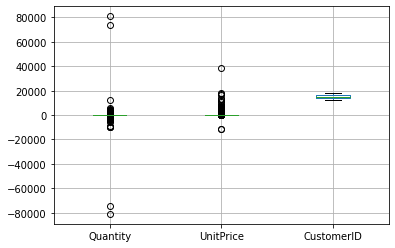

In [ ]:
df.boxplot()

Text(0.5, 6.79999999999999, 'Quantity')

<Figure size 1080x720 with 0 Axes>

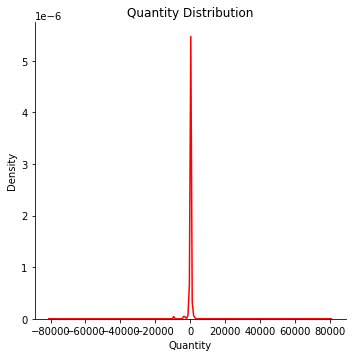

In [ ]:
#dependent variable "Quantity"
plt.figure(figsize=(15,10))
sns.displot(df['Quantity'],color="r",kind ='kde')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')

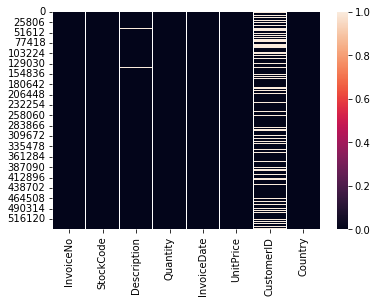

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull())

### What did you know about your dataset?



1.   From the given dataset we  were able to understand that there are total of 8 columns and 541909 rows and among those there are columns with Data Type different than that we require.
2.   There are multiple Missing/Null values and duplicate values in the dataset,to be specific the dataset needs to be cleaned.
3. There are outliers which needs to be eliminated inorder to get the output in a cleaner visualised form.



##Cleaning the Dataset

In [ ]:
#dropping the duplicates

df.drop_duplicates(inplace=True)

In [ ]:
#converting the datatypes
from datetime import datetime
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: datetime.strptime(x,'%m/%d/%y %H:%M'))

In [ ]:
df['UnitPrice']=df['UnitPrice'].astype('int64')

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.075492,15281.160818
std,219.130156,97.233634,1714.006089
min,-80995.000000,-11062.000000,12346.000000
25%,1.000000,1.000000,13939.000000
50%,3.000000,2.000000,15145.000000
75%,10.000000,4.000000,16784.000000
max,80995.000000,38970.000000,18287.000000


The first thing to notice is that we have some negative values in our dataset. Maybe, this could mean that these quantity was returned or cancelled. (Same for UnitPrice negative values).

### Working On Cancelled Invoice

From the dataset description we were able to understand that there are some cancelled quantity to with letter 'C'. Let's see if our hypothesis is correct about the negative quantity: **-80995**.
We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [ ]:
cancelled_orders =df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548.0,United Kingdom


In [ ]:
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2,16446.0,United Kingdom


In [ ]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


As we expected the negative values in the columns are nothing but the cancelled or returned orders.

In [ ]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have  9251  cancelled orders.
Percentage of orders canceled: 9251/25900 (35.72%) 


Answer: We have a large percentage of cancelled orders of 35%. Studying these cancelled orders may help in preventing future cancellation

Lets extract the most cancelled item


In [ ]:
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1,17315.0,United Kingdom


In [ ]:
cancelled_orders['Quantity'].min()

-80995

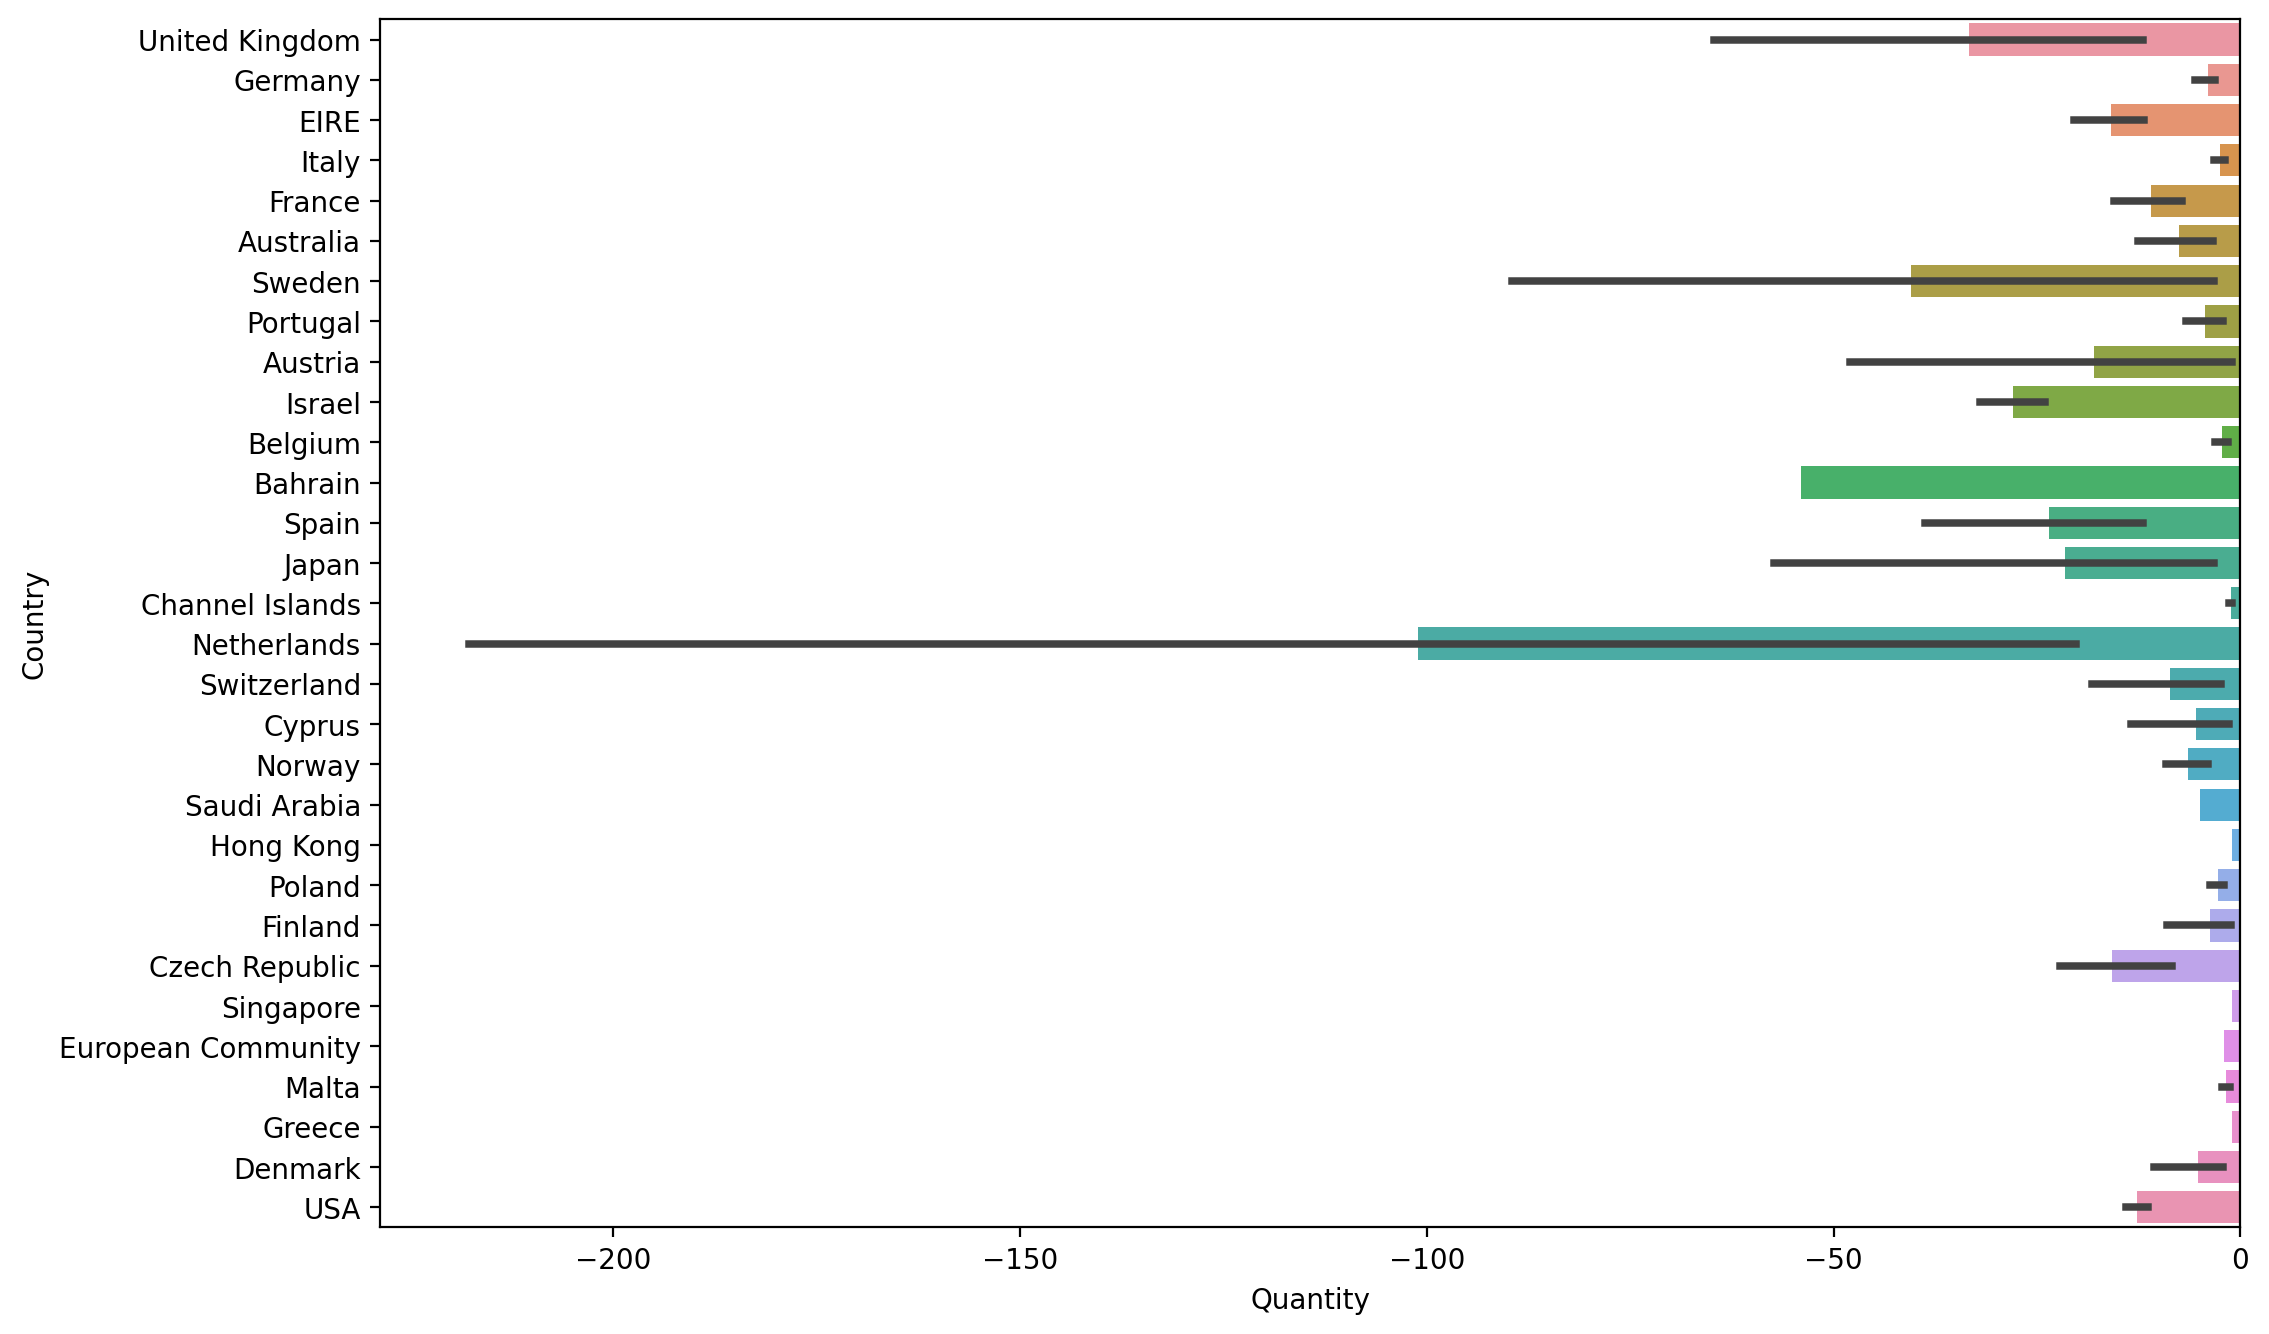

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
ax = sns.barplot(data=cancelled_orders,x='Quantity',y='Country')


In [ ]:
fig2=px.scatter(cancelled_orders,x='Country',y='Quantity',color='Description',title='Country with the most returns',width=1000, height=600)
fig2.show()

As we can see from the above scatter plot the most returned item among the list is **Paper Craft,Little Birdie** which was returned in bulk amount i.e **80.995k** from the Country United Kingdom.

#Revenue per Country

In [ ]:
df['Revenue'] = df['Quantity'] *df['UnitPrice']

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2,17850.0,United Kingdom,16
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4,12680.0,France,16
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4,12680.0,France,16


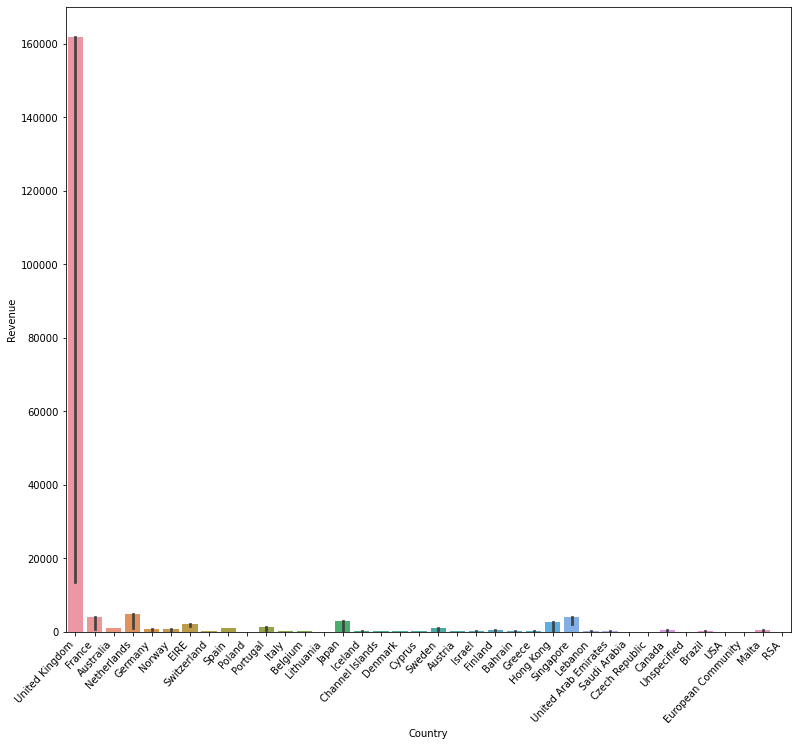

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Revenue',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [ ]:
# revenue generated by country
df.groupby('Country').sum().sort_values(by='Revenue', ascending=False)

,Quantity,UnitPrice,CustomerID,Revenue
Country,,,,
United Kingdom,4250328,1960695,5.544907e+09,5952380
EIRE,142495,43519,1.102464e+08,191032
Netherlands,200128,5307,3.419054e+07,188812
Germany,117341,32297,1.198819e+08,159574
France,110438,38168,1.074419e+08,136270
Australia,83643,3343,1.568057e+07,97025
Switzerland,30313,5637,2.377592e+07,40468
Spain,26817,11126,3.262673e+07,40178
Belgium,23152,6330,2.571829e+07,28096


Max Revenue generated is by the United Kingdom and the least generated Revenue is by Saudi Arabia

In [ ]:
df[df['Country']=='United Kingdom']['CustomerID'].nunique()

3950

So, we can conclude not only most sales revenues are achieved in the UK, but also most customers are located there too. We can explore this to find more about what products the customers buy together and what possible future opportunities in the UK Market.

In [ ]:
retail_uk = df[df['Country']=='United Kingdom']
retail_uk.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,490300.000000,490300.000000,356728.000000,490300.000000
mean,8.668831,3.998970,15543.795284,12.140281
std,228.768014,99.838148,1594.286219,381.736219
min,-80995.000000,-11062.000000,12346.000000,-161990.000000
25%,1.000000,1.000000,14191.000000,1.000000
50%,3.000000,2.000000,15513.000000,5.000000
75%,10.000000,4.000000,16931.000000,12.000000
max,80995.000000,38970.000000,18287.000000,161990.000000


In [ ]:
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['CustomerID'].isnull().sum() * 100 / len(retail_uk),2),"%" )
print('Number of countries: ',retail_uk['Country'].nunique())

Number of transactions:  23494
Number of products bought:  4065
Number of customers: 3950
Percentage of customers NA:  27.24 %
Number of countries:  1


#Explore quantity


###What are the products that are most bought in UK?

In [ ]:
groupedProduct = retail_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

,StockCode,Quantity
1145,22197,52905
2995,84077,48230
3511,85099B,43064
3532,85123A,36688
3302,84879,33420
1528,22616,25291
452,21212,24679
1126,22178,23213
83,17003,22765
964,21977,20254


In [ ]:
uk_product = df.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
uk_product.head(5)

,StockCode,Description,Quantity
3617,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
4197,85099B,JUMBO BAG RED RETROSPOT,47260
1333,22197,POPCORN HOLDER,36322
3956,84879,ASSORTED COLOUR BIRD ORNAMENT,36282
531,21212,PACK OF 72 RETROSPOT CAKE CASES,36016


In [ ]:
invoice_quantity= retail_uk.groupby('InvoiceNo', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()

,InvoiceNo,Quantity
20090,581483,80995
2136,541431,74215
17136,574941,14149
17765,576365,13956
13770,567423,12572


As we can see that Uk has the most customers as well as they generate the max revenue and in the beginning of the project it was asked to perform clustering on UK data only.

# **Data Preparation**

In [ ]:
retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2,17850.0,United Kingdom,16
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18


In [ ]:
retail_uk.shape

(490300, 9)

In [ ]:
retail_uk.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133572
Country             0
Revenue             0
dtype: int64

In [ ]:
#Removing missing values from CustomerID column, can ignore missing values in description column
retail_uk = retail_uk[pd.notnull(retail_uk['CustomerID'])]

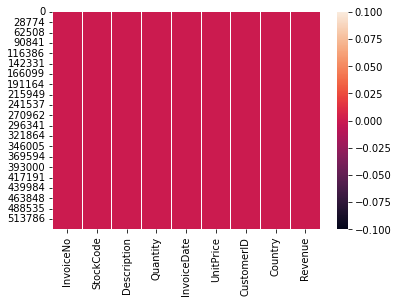

In [ ]:
sns.heatmap(retail_uk.isnull())

In [ ]:
#Verify is there any negative values in Quantity column
retail_uk.Quantity.min()

-80995

In [ ]:
#Verify is there any negative values in Unit column
retail_uk.UnitPrice.min()

0

In [ ]:
#Filter out records with negative values
retail_uk = retail_uk[(retail_uk['Quantity']>0)]

In [ ]:
#Convert the string date filled to datetime
retail_uk['InvoiceDate'] = pd.to_datetime(retail_uk['InvoiceDate'])

In [ ]:
retail_uk.shape

(349227, 9)

In [ ]:
retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2,17850.0,United Kingdom,16
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18


# **RFM Model Analysis**


## **What is RFM?**
* RFM is a process for assessing customer value. The letters RFM stand for Recency, Frequency, and Monetary.

*  RECENCY: How recently did the customer visit our website or make a purchase?

*  Frequency: How frequently do they visit or make purchases?

*  Monetary: How much money do they spend when they buy anything or how much money do we make from their visit?

## **Why it's Required?**
* RFM Analysis is a marketing framework used to comprehend and examine consumer behaviour based on the RECENCY, FREQUENCY, and FINANCIAL aspects mentioned above.

* The RFM Analysis will assist companies in dividing their consumer bases into a variety of homogeneous groups so that they may use various targeted marketing techniques to interact with each group.

In [ ]:
retail_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2,17850.0,United Kingdom,16
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850.0,United Kingdom,18
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1,15804.0,United Kingdom,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2,13113.0,United Kingdom,16
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1,13113.0,United Kingdom,24
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8,13113.0,United Kingdom,192


In [ ]:
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = retail_uk.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Revenue': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,74215
1,12747.0,2,103,3388
2,12748.0,0,4413,21890
3,12749.0,3,199,3242
4,12820.0,3,59,576


In [ ]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Histogram(x=RFMScores['Recency'], nbinsx=20, name='Recency', marker_color='#17becf'))

# add hover information to the plot
fig.update_traces(hovertemplate='Count: %{y}')

# set the plot title and axis labels
fig.update_layout(title='Recency Distribution', xaxis_title='Recency', yaxis_title='Count', showlegend=True)

fig.show()


In [ ]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    3921.000000
mean       89.065800
std       214.022733
min         1.000000
25%        17.000000
50%        40.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

In [ ]:
x = RFMScores.query('Frequency < 1000')['Frequency']

fig = go.Figure(data=go.Histogram(x=x, nbinsx=20, name='Frequency', marker_color='maroon'))

# add hover information to the plot
fig.update_traces(hovertemplate='Count: %{y}')

# set the plot title and axis labels
fig.update_layout(title='Frequency Distribution (Frequency < 1000)', xaxis_title='Frequency', yaxis_title='Count', showlegend=True)

fig.show()


In [ ]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count      3921.000000
mean       1334.747768
std        6200.571137
min           0.000000
25%         191.000000
50%         436.000000
75%        1070.000000
max      223987.000000
Name: Monetary, dtype: float64

In [ ]:
x = RFMScores.query('Monetary < 1000')['Monetary']

fig = go.Figure(data=go.Histogram(x=x, nbinsx=20, name='Monetary', marker_color='royalblue'))

# add hover information to the plot
fig.update_traces(hovertemplate='Count: %{y}')

# set the plot title and axis labels
fig.update_layout(title='Monetary Distribution (Monetary < 1000)', xaxis_title='Monetary', yaxis_title='Count', showlegend=True)

fig.show()

In [ ]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Monetary': {0.25: 191.0, 0.5: 436.0, 0.75: 1070.0}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,74215,4,4,1
12747.0,2,103,3388,1,1,1
12748.0,0,4413,21890,1,1,1
12749.0,3,199,3242,1,1,1
12820.0,3,59,576,1,2,2


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,74215,4,4,1,441,9
12747.0,2,103,3388,1,1,1,111,3
12748.0,0,4413,21890,1,1,1,111,3
12749.0,3,199,3242,1,1,1,111,3
12820.0,3,59,576,1,2,2,122,5


In [ ]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['L1', 'L2', 'L3', 'L4']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,74215,4,4,1,441,9,L3
1,12747.0,2,103,3388,1,1,1,111,3,L1
2,12748.0,0,4413,21890,1,1,1,111,3,L1
3,12749.0,3,199,3242,1,1,1,111,3,L1
4,12820.0,3,59,576,1,2,2,122,5,L1


In [ ]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,0,431,223987,1,1,1,111,3,L1
1,17450.0,8,336,168171,1,1,1,111,3,L1
2,17511.0,2,963,59321,1,1,1,111,3,L1
3,14096.0,4,5111,56688,1,1,1,111,3,L1
4,16684.0,4,277,44357,1,1,1,111,3,L1
5,14088.0,10,589,44172,1,1,1,111,3,L1
6,15311.0,0,2366,41924,1,1,1,111,3,L1
7,13089.0,2,1814,41608,1,1,1,111,3,L1
8,15061.0,3,403,39994,1,1,1,111,3,L1
9,13694.0,3,568,36267,1,1,1,111,3,L1


In [ ]:
import plotly.graph_objs as go

# create 3D scatter plot trace with hovering text
trace = go.Scatter3d(
    x=RFMScores.Recency,
    y=RFMScores.Frequency,
    z=RFMScores.Monetary,
    mode='markers',
    marker=dict(
        size=5,
        color=RFMScores.Monetary,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(
            title='Monetary Value',
        ),
    ),
    text=["Recency: {}<br>Frequency: {}<br>Monetary: {}".format(r, f, m)
          for r, f, m in zip(RFMScores.Recency, RFMScores.Frequency, RFMScores.Monetary)],
    hovertemplate='%{text}',
)

# create layout with axis labels and legend
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary Value'),
    ),
    showlegend=True,
)

# create figure with trace and layout
fig = go.Figure(data=[trace], layout=layout)

# show the plot
fig.show()


In [ ]:
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [gobj.Scatter3d(x=graph.query("RFM_Loyalty_Level == 'L4'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L4'")['Frequency'],
        z=graph.query("RFM_Loyalty_Level == 'L4'")['Monetary'],
        mode='markers',
        name='L4',
        marker=dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L3'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L3'")['Frequency'],
        z=graph.query("RFM_Loyalty_Level == 'L3'")['Monetary'],
        mode='markers',
        name='L3',
        marker=dict(
            size=9,
            line=dict(width=1),
            color='green',
            opacity=0.5
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L2'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L2'")['Frequency'],
        z=graph.query("RFM_Loyalty_Level == 'L2'")['Monetary'],
        mode='markers',
        name='L2',
        marker=dict(
            size=11,
            line=dict(width=1),
            color='red',
            opacity=0.9
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L1'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L1'")['Frequency'],
        z=graph.query("RFM_Loyalty_Level == 'L1'")['Monetary'],
        mode='markers',
        name='L1',
        marker=dict(
            size=13,
            line=dict(width=1),
            color='black',
            opacity=0.9
        )
    )
]

plot_layout = gobj.Layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    ),
    title='Segments'
)

fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


In [ ]:
#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [    gobj.Scatter3d(        x=graph.query("RFM_Loyalty_Level == 'L4'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'L4'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L4'")['Recency'],
        mode='markers',
        name='L4',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L3'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'L3'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L3'")['Recency'],
        mode='markers',
        name='L3',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L2'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'L2'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L2'")['Recency'],
        mode='markers',
        name='L2',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L1'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'L1'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L1'")['Recency'],
        mode='markers',
        name='L1',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
    scene=dict(
        xaxis=dict(title='Frequency'),
        yaxis=dict(title='Monetary'),
        zaxis=dict(title='Recency')
    ),
    title='Segments'
)

fig = gobj.Figure(data=plot_data, layout=plot_layout)

po.iplot(fig)


In [ ]:
#Recency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L4'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L4'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L4'")['Frequency'],
        mode='markers',
        name='L4',
        marker=dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L3'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L3'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L3'")['Frequency'],
        mode='markers',
        name='L3',
        marker=dict(
            size=9,
            line=dict(width=1),
            color='green',
            opacity=0.5
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L2'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L2'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L2'")['Frequency'],
        mode='markers',
        name='L2',
        marker=dict(
            size=11,
            line=dict(width=1),
            color='red',
            opacity=0.9
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L1'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L1'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L1'")['Frequency'],
        mode='markers',
        name='L1',
        marker=dict(
            size=13,
            line=dict(width=1),
            color='black',
            opacity=0.9
        )
    ),
]

plot_layout = gobj.Layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Monetary',
        zaxis_title='Frequency'
    ),
    title='Segments'
)

fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)
